## Final Project Submission

Please fill out:
* Student name: Gladys Kemunto
* Student pace: self paced / part time / full time: Part-time
* Scheduled project review date/time: 3rd June 2024
* Instructor name: Samuel Karu
* Blog post URL:https://github.com/Mosota-Kemunto-Gladys-2020/dsc-phase-1-project-Gladys.git


In [51]:
# Import Relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os

In [52]:
# Get to know  my current working directory
import os
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print(current_directory)

c:\Users\Augustine Wanyonyi\Desktop\Phase_1_Project_June24\dsc-phase-1-project-v2-4\dsc-phase-1-project-v2-4\zippedData


In [53]:
# Align the path accordingly to access all required files

os.chdir('c:\\Users\\Augustine Wanyonyi\\Desktop\\Phase_1_Project_June24\\dsc-phase-1-project-v2-4\\dsc-phase-1-project-v2-4\\zippedData')

# 1.Data analysis of bom.movie_gross csv.gz file

To analyze the bom_movie_gross dataset, we will perform a series of steps to explore the data, understand trends, and extract insights. Here’s a structured approach to analyze this data:

Initial stages:
Check the structure of the DataFrame.
Look at the summary statistics.
Identify any missing values.

Calculate Total Gross:
Add a new column total_gross which is the sum of domestic_gross and foreign_gross.

Analyze Trends Over Time:
Group the data by Year and calculate the total and average gross.
Visualize the trends over time using plots.

Identify Top Performers:
Find the top movies by total gross.
Compare domestic and foreign gross for these top movies.

Distribution Analysis:
Analyze the distribution of domestic and foreign gross.
Check for any patterns or anomalies.

Visualize Insights:
Create visualizations to better understand and present the data.


In [54]:
#Read the compressed gzip,csv file using pandas dataframe

file_path = 'bom.movie_gross.csv.gz'
bom_movie_gross= pd.read_csv(file_path,compression='gzip')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [55]:
bom_movie_gross.shape

(3387, 5)

In [56]:
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [57]:
bom_movie_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV    415000000.00   
1                      Alice in Wonderland (2010)          BV    334200000.00   
2     Harry Potter and the Deathly Hallows Part 1          WB    296000000.00   
3                                       Inception          WB    292600000.00   
4                             Shrek Forever After        P/DW    238700000.00   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.         6200.00   
3383                  Edward II (2018 re-release)          FM         4800.00   
3384                                     El Pacto        Sony         2500.00   
3385                                     The Swan  Synergetic         2400.00   
3386                            An Actor Prepares       Grav.         1700.00

In [58]:
# Analyse date to check for Unique values in 'domestic_gross' and Unique values in 'foreign_gross


# Load the dataset
file_path = 'bom.movie_gross.csv.gz'  # Adjust the path as needed
bom_movie_gross = pd.read_csv(file_path, compression='gzip')

# Check for non-numeric values in 'domestic_gross' column
print("Unique values in 'domestic_gross':")
print(bom_movie_gross['domestic_gross'].unique())

# Check for non-numeric values in 'foreign_gross' column
print("Unique values in 'foreign_gross':")
print(bom_movie_gross['foreign_gross'].unique())



Unique values in 'domestic_gross':
[4.150e+08 3.342e+08 2.960e+08 ... 2.070e+04 1.290e+04 2.400e+03]
Unique values in 'foreign_gross':
['652000000' '691300000' '664300000' ... '530000' '256000' '30000']


In [59]:
# Convert non-numeric values to NaN
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

# Handle NaN values (e.g., replace with zero)
bom_movie_gross['domestic_gross'].fillna(0, inplace=True)
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)

# Calculate total gross (domestic + foreign)
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']


In [60]:
# Get summary statistics
summary_stats = bom_movie_gross[['domestic_gross', 'foreign_gross', 'total_gross']].describe()
print(summary_stats)


       domestic_gross  foreign_gross   total_gross
count         3387.00        3387.00       3387.00
mean      28508205.96    45029792.91   73537998.87
std       66755749.11   112684346.56  170509096.95
min              0.00           0.00        100.00
25%         111500.00           0.00     274000.00
50%        1300000.00     1500000.00    5475000.00
75%       27500000.00    29150000.00   61350000.00
max      936700000.00   960500000.00 1518900000.00


In [61]:
# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Now, when you print the DataFrame, it will display numbers in standard numeric format
print(bom_movie_gross[['domestic_gross', 'foreign_gross', 'total_gross']].describe())
# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)


       domestic_gross  foreign_gross   total_gross
count         3387.00        3387.00       3387.00
mean      28508205.96    45029792.91   73537998.87
std       66755749.11   112684346.56  170509096.95
min              0.00           0.00        100.00
25%         111500.00           0.00     274000.00
50%        1300000.00     1500000.00    5475000.00
75%       27500000.00    29150000.00   61350000.00
max      936700000.00   960500000.00 1518900000.00


In [62]:
# Sort movies by total gross
sorted_movies = bom_movie_gross.sort_values(by='total_gross', ascending=False)
print(sorted_movies.head(10))

                                            title studio  domestic_gross  \
727                         Marvel's The Avengers     BV    623400000.00   
1875                      Avengers: Age of Ultron     BV    459000000.00   
3080                                Black Panther     BV    700100000.00   
328   Harry Potter and the Deathly Hallows Part 2     WB    381000000.00   
2758                     Star Wars: The Last Jedi     BV    620200000.00   
3081               Jurassic World: Fallen Kingdom   Uni.    417700000.00   
1127                                       Frozen     BV    400700000.00   
2759                  Beauty and the Beast (2017)     BV    504000000.00   
3082                                Incredibles 2     BV    608600000.00   
1128                                   Iron Man 3     BV    409000000.00   

      foreign_gross  year   total_gross  
727    895500000.00  2012 1518900000.00  
1875   946400000.00  2015 1405400000.00  
3080   646900000.00  2018 1347000000.

In [63]:
type(sorted_movies)

pandas.core.frame.DataFrame

In [64]:
# Get summary statistics
summary_stats = bom_movie_gross[['domestic_gross', 'foreign_gross', 'total_gross']].describe()
print(summary_stats)


       domestic_gross  foreign_gross   total_gross
count         3387.00        3387.00       3387.00
mean      28508205.96    45029792.91   73537998.87
std       66755749.11   112684346.56  170509096.95
min              0.00           0.00        100.00
25%         111500.00           0.00     274000.00
50%        1300000.00     1500000.00    5475000.00
75%       27500000.00    29150000.00   61350000.00
max      936700000.00   960500000.00 1518900000.00



Here are the summary statistics for domestic_gross, foreign_gross, and total_gross:

Key Insights for Microsoft
1. Average Performance (Mean)
Domestic Gross: On average, films make about $28.5 million domestically.
Foreign Gross: Films perform better internationally, with an average gross of about $45 million.
Total Gross: The combined average gross for films is about $73.5 million.
Implication for Microsoft: Microsoft's new movie studio should focus on producing films with international appeal to maximize revenue. Consider genres and themes that are globally appealing.

2. Variation in Performance (Standard Deviation)
Standard Deviation: High variability in earnings with a standard deviation of about $66.8 million for domestic gross and $112.7 million for foreign gross. The total gross variation is about $170.5 million.
Implication for Microsoft: The movie market is highly unpredictable. Microsoft should diversify its film portfolio to spread risk and capture different market segments.

3. Quartiles and Median
25th Percentile: 25% of films earn less than $111,500 domestically and have no foreign gross, totaling $274,000.
Median (50th Percentile): The median values are $1.3 million (domestic), $1.5 million (foreign), and $5.475 million (total).
75th Percentile: The top 25% of films earn $27.5 million domestically and $29.15 million internationally, totaling $61.35 million.
Implication for Microsoft: Most films have modest earnings, with only a few achieving blockbuster status. Setting realistic goals based on median values can help in budget planning and marketing strategies.

4. Extremes (Min and Max)
Minimum Gross: The lowest-performing films make $0 domestically and internationally, with a total gross as low as $100.
Maximum Gross: The highest-performing films make $936.7 million domestically and $960.5 million internationally, totaling $1.519 billion.
Implication for Microsoft: While blockbusters are rare, they contribute significantly to total revenue. Microsoft should aim for a mix of high-risk, high-reward blockbusters and steady-performing films.

Business Recommendations for Microsoft
Focus on International Appeal:

Given the higher average foreign gross, Microsoft should produce films that resonate with international audiences. This can be achieved through diverse casting, globally appealing storylines, and international marketing strategies.
Diversify Film Portfolio:

To manage risk and maximize potential earnings, Microsoft should produce a mix of films, including low-budget films with high potential for return and a few high-budget films that could become blockbusters.
Set Realistic Goals:

Targeting the median values ($1.3 million domestic and $1.5 million foreign gross) ensures most films achieve a satisfactory level of success. Microsoft should focus on producing films that at least reach these median values to ensure profitability.

# Visualizing the Data
To support these insights with visualizations, you will create boxplots, bar charts, or line graphs showing the distribution of domestic, foreign, and total gross, and highlighting the quartiles

In [65]:
# Boxplot for Domestic, Foreign, and Total Gross

       domestic_gross  foreign_gross   total_gross
count         3387.00        3387.00       3387.00
mean      28508205.96    45029792.91   73537998.87
std       66755749.11   112684346.56  170509096.95
min              0.00           0.00        100.00
25%         111500.00           0.00     274000.00
50%        1300000.00     1500000.00    5475000.00
75%       27500000.00    29150000.00   61350000.00
max      936700000.00   960500000.00 1518900000.00


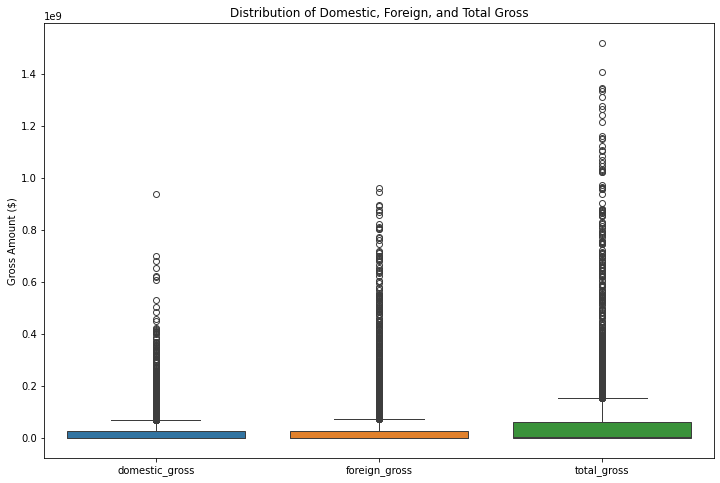

In [66]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the summary statistics
print(summary_stats)

# Boxplot for Domestic, Foreign, and Total Gross
plt.figure(figsize=(12, 8))
sns.boxplot(data=bom_movie_gross[['domestic_gross', 'foreign_gross', 'total_gross']])
plt.title('Distribution of Domestic, Foreign, and Total Gross')
plt.ylabel('Gross Amount ($)')
plt.show()


The box plot visualizes the distribution of three variables: domestic_gross, foreign_gross, and total_gross. Here’s a detailed interpretation:

Domestic Gross (Left Plot):

Median (Middle Line of the Box): The median domestic gross is indicated by the horizontal line within the box. This represents the 50th percentile of the data.
Interquartile Range (IQR, Box Edges): The edges of the box represent the 25th and 75th percentiles, showing where the middle 50% of the data lie.
Whiskers: The lines extending from the box (whiskers) indicate the range within 1.5 times the IQR from the quartiles. Data points outside this range are considered outliers.
Outliers (Dots Beyond Whiskers): The dots above the whiskers represent outliers, which are domestic gross values significantly higher than the rest of the data.
Foreign Gross (Middle Plot):

Median: The median foreign gross is indicated by the middle line within the box.
IQR: The box shows the 25th to 75th percentile range for foreign gross.
Whiskers and Outliers: The whiskers indicate the range of typical values, and the dots above the whiskers are outliers, representing significantly high foreign gross values.
Total Gross (Right Plot):

Median: The median total gross is indicated by the middle line within the box.
IQR: The box represents the 25th to 75th percentile range for total gross.
Whiskers and Outliers: The whiskers show the range of typical values, and the outliers are indicated by the dots above the whiskers, representing significantly high total gross values.
Key Insights for Microsoft
High Variability:

All three distributions show a high level of variability, as indicated by the presence of many outliers and the spread of the whiskers. This suggests that while some films have average gross values, others perform exceptionally well or poorly.
Significant Outliers:

The presence of many outliers in all three plots indicates that there are several films with exceptionally high gross values. These outliers could represent blockbuster movies that significantly outperform typical films.
Domestic vs. Foreign Gross:

Comparing the domestic_gross and foreign_gross, the foreign gross seems to have a higher median and potentially higher maximum values, indicating that films might generally perform better in foreign markets than domestically.
Total Gross:

The total_gross plot consolidates the domestic and foreign gross, showing a wider range and more outliers. This indicates that the total gross can vary significantly, influenced by both domestic and foreign performances.
Recommendations for Microsoft
Focus on International Markets:

Given the higher median and more significant outliers in the foreign gross, Microsoft should consider targeting international markets when producing new films. This could involve creating content with global appeal and investing in international marketing campaigns.
Diverse Film Portfolio:

The high variability and presence of outliers suggest that the film industry is unpredictable. Microsoft should aim to produce a diverse portfolio of films, including both low-budget and high-budget projects, to balance risk and maximize potential returns.
Leverage Blockbusters:

Since outliers represent films with exceptionally high gross values, Microsoft should aim to create blockbuster films occasionally. These high-performing films can significantly boost the studio's overall revenue.
By analyzing the distribution of domestic, foreign, and total gross values, Microsoft can make informed decisions about the types of films to produce and the markets to target.

In [67]:
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

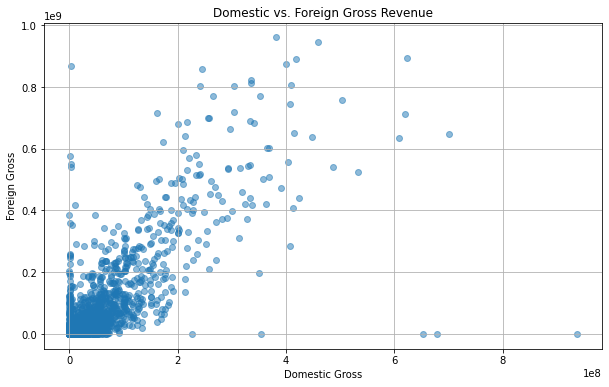

In [68]:
import matplotlib.pyplot as plt
# Scatter plot of domestic vs. foreign gross
plt.figure(figsize=(10, 6))
plt.scatter(bom_movie_gross['domestic_gross'], bom_movie_gross['foreign_gross'], alpha=0.5)
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic vs. Foreign Gross Revenue')
plt.grid(True)
plt.show()

The scatter plot above illustrates the relationship between domestic gross revenue and foreign gross revenue for movies. Here are some observations:

Clustering: A large number of movies have both domestic and foreign gross revenues below $200 million.
High Gross Outliers: There are a few outliers with extremely high domestic and foreign gross revenues, suggesting blockbuster movies  because they stand out as having much higher earnings.
Positive Correlation: There's a general positive correlation between domestic and foreign gross revenues, indicating that movies that perform well domestically often also perform well internationally.

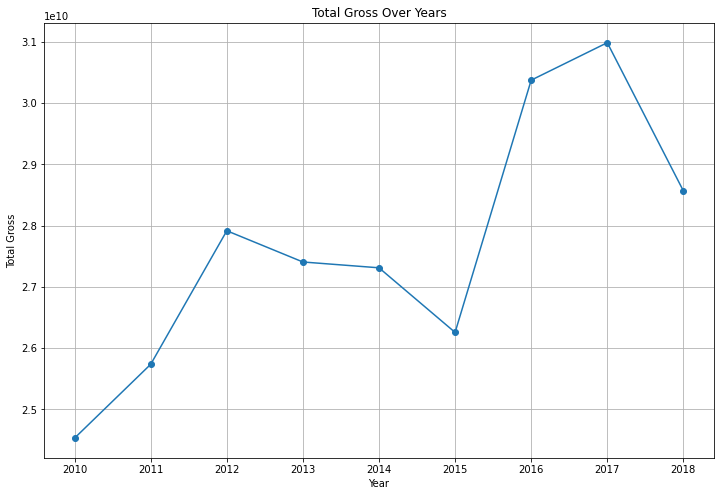

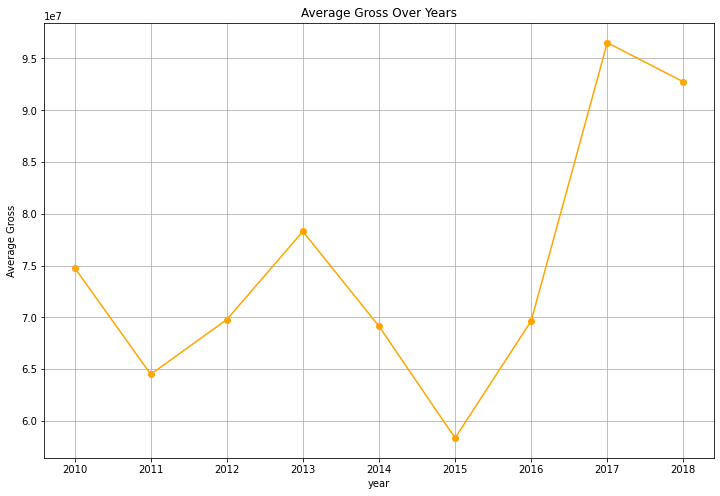

In [69]:
# Group by Year and calculate total and average gross
yearly_gross = bom_movie_gross.groupby('year')['total_gross'].sum()
average_gross = bom_movie_gross.groupby('year')['total_gross'].mean()

# Plot the trends over time
plt.figure(figsize=(12, 8))
plt.plot(yearly_gross.index, yearly_gross.values, marker='o')
plt.title('Total Gross Over Years')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(average_gross.index, average_gross.values, marker='o', color='orange')
plt.title('Average Gross Over Years')
plt.xlabel('year')
plt.ylabel('Average Gross')
plt.grid(True)
plt.show()


Analysis of Average Gross Over Years
The line chart provided shows the trend of average gross revenue for movies from 2010 to 2018. Here are some observations and insights based on this chart:

Observations:
Fluctuating Trend: The average gross revenue shows significant fluctuations over the years.

Peaks and Troughs:

Peak in 2017: The year 2017 shows a significant peak in average gross revenue.
Trough in 2015: There is a noticeable dip in average gross revenue in 2015.

Recovery and Decline:
Post-2015 Recovery: After the dip in 2015, there is a strong recovery, peaking in 2017.
Slight Decline in 2018: The average gross revenue slightly declines after the peak in 2017.

Insights and Recommendations:
Identify High-Performing Years:

Analyze 2017: Investigate the factors that contributed to the high average gross revenue in 2017. This could include successful genres, franchises, or marketing strategies.
Leverage Success: Emulate the strategies from 2017 for future movie productions to maximize average gross revenue.

Understand Low-Performing Years:

Analyze 2015: Examine why 2015 had a low average gross revenue. Factors could include economic downturns, fewer blockbuster releases, or increased competition.
Risk Mitigation: Develop strategies to mitigate risks identified in low-performing years to avoid similar pitfalls in the future.

Consistent Quality and Marketing:

High-Quality Productions: Ensure consistent investment in high-quality productions to maintain or increase average gross revenue.
Effective Marketing: Implement effective marketing campaigns, especially during years where competition is high or audience interest is low.

Strategic Release Timing:

Optimize Release Schedules: Based on the trend, optimize movie release schedules to coincide with periods of high audience interest and low competition.
Seasonal Analysis: Conduct a seasonal analysis to determine the best times of the year to release movies for maximum average gross revenue.

Next Steps:

Deep Dive Analysis: Perform a detailed analysis of movies released in peak and trough years to identify common factors contributing to their performance.
Market Research: Conduct market research to understand changing audience preferences and emerging trends.

Strategy Formulation: Develop a comprehensive strategy for Microsoft's new movie studio based on the insights gathered from data analysis.

In [70]:
pwd

'c:\\Users\\Augustine Wanyonyi\\Desktop\\Phase_1_Project_June24\\dsc-phase-1-project-v2-4\\dsc-phase-1-project-v2-4\\zippedData'

In [71]:
import sqlite3
import pandas as pd
import zipfile
import os

# Define the path to the zip file and the destination directory
zip_file_path = 'im.db.zip'
destination_dir = 'unzipped_files'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

# Find the unzipped database file
unzipped_files = os.listdir(destination_dir)
db_file = [file for file in unzipped_files if file.endswith('.db')][0]
db_file_path = os.path.join(destination_dir, db_file)


In [72]:
import sqlite3

# Connect to the database and list all tables
with sqlite3.connect('im.db') as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

# Display the list of tables
print(tables)

[]


In [73]:
# Connect to the database and get the schema of the movie_basics table
with sqlite3.connect('im.db') as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA table_info(movie_basics);")
    schema = cursor.fetchall()

# Display the schema of the movie_basics table
print(schema)

[]


In [74]:
import pandas as pd
import sqlite3

# Connect to the database and list all tables
with sqlite3.connect('im.db') as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

# Display the list of tables
print("Tables in the database:", tables)

# If the table exists, get the schema
if ('movie_basics',) in tables:
    with sqlite3.connect('im.db') as conn:
        cursor = conn.cursor()
        cursor.execute("PRAGMA table_info(movie_basics);")
        schema = cursor.fetchall()
    print("Schema of movie_basics table:", schema)
else:
    print("Table 'movie_basics' does not exist in the database.")

# Define your SQL query
query = """
SELECT movie_basics.primary_title,
       movie_basics.start_year,
       movie_basics.genres,
       movie_ratings.averagerating,
       movie_ratings.numvotes
FROM movie_basics 
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
WHERE movie_basics.start_year >= 2019
      AND movie_ratings.numvotes >= 50000  -- Consider only movies with a significant number of votes
ORDER BY movie_ratings.averagerating DESC, movie_ratings.numvotes DESC;
"""

# Execute the query and read the result into a pandas DataFrame using with statement
if ('movie_basics',) in tables and ('movie_ratings',) in tables:
    with sqlite3.connect('im.db') as conn:
        df = pd.read_sql(query, conn)
    # Display the DataFrame
    print(df.head(20))
else:
    print("Required tables do not exist in the database.")

Tables in the database: []
Table 'movie_basics' does not exist in the database.
Required tables do not exist in the database.


In [75]:

import sqlite3
import pandas as pd
import zipfile
import os

# Define your SQL query
query = """
SELECT movie_basics.primary_title,
       movie_basics.start_year,
       movie_basics.genres,
       movie_ratings.averagerating,
       movie_ratings.numvotes
FROM movie_basics 
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
WHERE movie_basics.start_year >= 2019
      AND movie_ratings.numvotes >= 50000  -- Consider only movies with a significant number of votes
ORDER BY movie_ratings.averagerating DESC, movie_ratings.numvotes DESC;
"""

# Execute the query and read the result into a pandas DataFrame using with statement
with sqlite3.connect('im.db') as conn:
    df = pd.read_sql(query, conn)

# Display the DataFrame
print(df.head(20))




DatabaseError: Execution failed on sql '
SELECT movie_basics.primary_title,
       movie_basics.start_year,
       movie_basics.genres,
       movie_ratings.averagerating,
       movie_ratings.numvotes
FROM movie_basics 
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
WHERE movie_basics.start_year >= 2019
      AND movie_ratings.numvotes >= 50000  -- Consider only movies with a significant number of votes
ORDER BY movie_ratings.averagerating DESC, movie_ratings.numvotes DESC;
': no such table: movie_basics